In [141]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import scipy.stats as st




In [142]:
# Read the text file into a DataFrame
file_path = "Resources/BYSTATE.TXT"
state_df = pd.read_csv(file_path, delimiter="|", low_memory=False)
state_df

,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
0,Alabama,359.6,374.7,367.1,9297,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999,397.2,413.7,405.4
1,Alabama,160.6,170.5,165.5,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999,184.8,196.1,190.4
2,Alabama,362.0,377.0,369.4,9471,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000,403.0,419.6,411.3
3,Alabama,160.8,170.6,165.7,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000,186.5,197.9,192.2
4,Alabama,377.7,392.9,385.2,9971,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001,423.3,440.3,431.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002403,Wyoming,3.2,6.7,4.7,34,Mortality,491835,Non-Hispanic White,Male and Female,Urinary Bladder,2018,4.8,9.7,6.9
1002404,Wyoming,18.8,26.2,22.3,155,Incidence,492134,Non-Hispanic White,Male and Female,Urinary Bladder,2019,26.7,36.9,31.5
1002405,Wyoming,2.8,6.2,4.2,29,Mortality,492134,Non-Hispanic White,Male and Female,Urinary Bladder,2019,3.9,8.5,5.9
1002406,Wyoming,20.1,27.9,23.7,166,Incidence,493371,Non-Hispanic White,Male and Female,Urinary Bladder,2020,28.7,39.2,33.6


In [143]:
#Filter the table for all cancer types, races, and sex
#drop age and crude columns 
all_cancer_df = state_df.drop(["AGE_ADJUSTED_CI_LOWER", "AGE_ADJUSTED_CI_UPPER", "AGE_ADJUSTED_RATE", "CRUDE_CI_LOWER", "CRUDE_CI_UPPER", "CRUDE_RATE"], axis=1)
filtered_df = all_cancer_df[(all_cancer_df['SITE'] == 'All Cancer Sites Combined') & (all_cancer_df['RACE'] == 'All Races') & (all_cancer_df['SEX'] == 'Male and Female')]
filtered_df

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
2093,Alabama,19290,Incidence,4430141,All Races,Male and Female,All Cancer Sites Combined,1999
2094,Alabama,9506,Mortality,4430141,All Races,Male and Female,All Cancer Sites Combined,1999
2095,Alabama,19858,Incidence,4452173,All Races,Male and Female,All Cancer Sites Combined,2000
2096,Alabama,9807,Mortality,4452173,All Races,Male and Female,All Cancer Sites Combined,2000
2097,Alabama,21087,Incidence,4467634,All Races,Male and Female,All Cancer Sites Combined,2001
...,...,...,...,...,...,...,...,...
984808,Wyoming,997,Mortality,579054,All Races,Male and Female,All Cancer Sites Combined,2018
984809,Wyoming,3049,Incidence,580116,All Races,Male and Female,All Cancer Sites Combined,2019
984810,Wyoming,1016,Mortality,580116,All Races,Male and Female,All Cancer Sites Combined,2019
984811,Wyoming,2853,Incidence,582328,All Races,Male and Female,All Cancer Sites Combined,2020


In [144]:
#Filter all cancer types incidence count across the states. 
incidence_df = filtered_df[(filtered_df['YEAR'] != '2016-2020') & (filtered_df['AREA'] != 'United States (comparable to ICD-O-2)')].copy()
incidence_rate_df = incidence_df[incidence_df['EVENT_TYPE'] == 'Incidence'].copy()

incidence_rate_df = incidence_rate_df.astype({"COUNT": int, "POPULATION": int, "YEAR": int})
incidence_rate_df

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
2093,Alabama,19290,Incidence,4430141,All Races,Male and Female,All Cancer Sites Combined,1999
2095,Alabama,19858,Incidence,4452173,All Races,Male and Female,All Cancer Sites Combined,2000
2097,Alabama,21087,Incidence,4467634,All Races,Male and Female,All Cancer Sites Combined,2001
2099,Alabama,21422,Incidence,4480089,All Races,Male and Female,All Cancer Sites Combined,2002
2101,Alabama,20821,Incidence,4503491,All Races,Male and Female,All Cancer Sites Combined,2003
...,...,...,...,...,...,...,...,...
984801,Wyoming,2802,Incidence,585243,All Races,Male and Female,All Cancer Sites Combined,2016
984805,Wyoming,2891,Incidence,579994,All Races,Male and Female,All Cancer Sites Combined,2017
984807,Wyoming,2858,Incidence,579054,All Races,Male and Female,All Cancer Sites Combined,2018
984809,Wyoming,3049,Incidence,580116,All Races,Male and Female,All Cancer Sites Combined,2019


In [145]:
#Filter all cancer types mortality count across the states. 
mortality_df = filtered_df[(filtered_df['YEAR'] != '2016-2020') & (filtered_df['AREA'] != 'United States (comparable to ICD-O-2)')].copy()
mortality_rate_df = mortality_df[incidence_df['EVENT_TYPE'] == 'Mortality'].copy()
#incidence_rate_df.loc[:, "Rate / 100,000 ppl"] = " "
mortality_rate_df = mortality_rate_df.astype({"COUNT": int, "POPULATION": int, "YEAR": int})
mortality_rate_df


,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
2094,Alabama,9506,Mortality,4430141,All Races,Male and Female,All Cancer Sites Combined,1999
2096,Alabama,9807,Mortality,4452173,All Races,Male and Female,All Cancer Sites Combined,2000
2098,Alabama,9801,Mortality,4467634,All Races,Male and Female,All Cancer Sites Combined,2001
2100,Alabama,9698,Mortality,4480089,All Races,Male and Female,All Cancer Sites Combined,2002
2102,Alabama,9812,Mortality,4503491,All Races,Male and Female,All Cancer Sites Combined,2003
...,...,...,...,...,...,...,...,...
984802,Wyoming,962,Mortality,585243,All Races,Male and Female,All Cancer Sites Combined,2016
984806,Wyoming,948,Mortality,579994,All Races,Male and Female,All Cancer Sites Combined,2017
984808,Wyoming,997,Mortality,579054,All Races,Male and Female,All Cancer Sites Combined,2018
984810,Wyoming,1016,Mortality,580116,All Races,Male and Female,All Cancer Sites Combined,2019


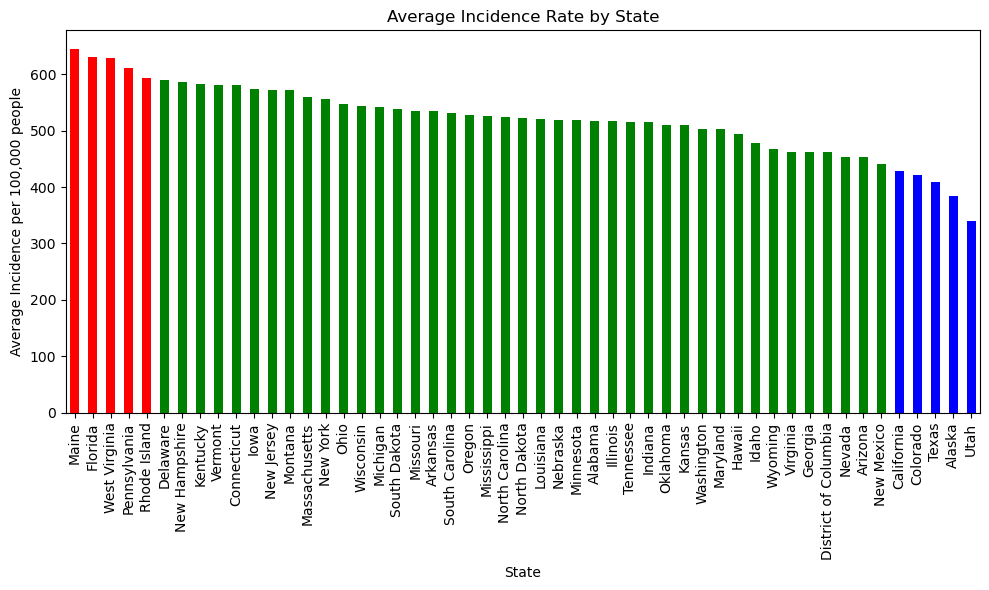

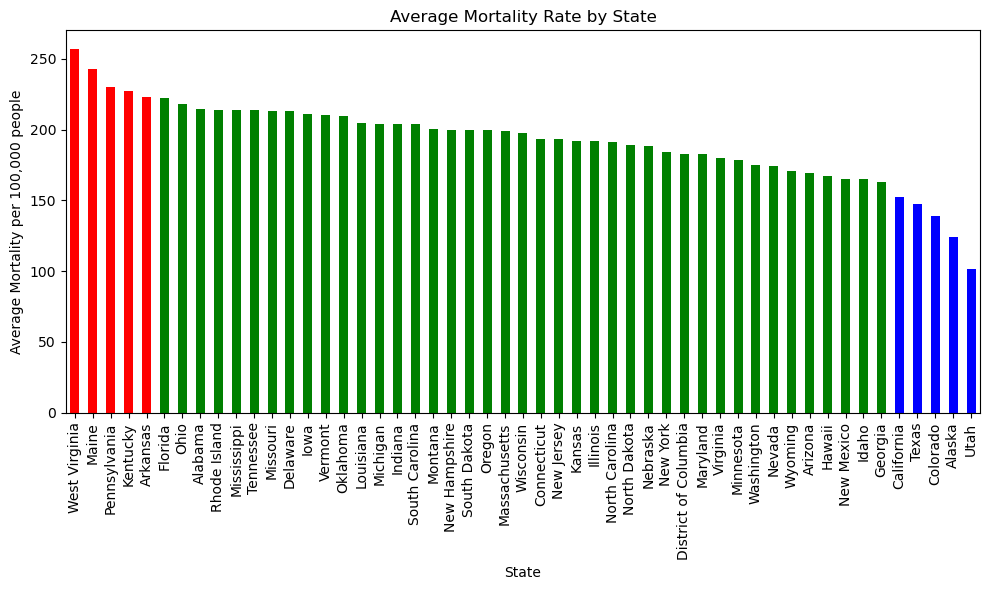

In [147]:
%%capture --no-display
#Plot bar for average incidence and mortality rate for each state 
#Bar plot of average incidence rate per 100,000 ppl in each states
avg_incidence_count = incidence_rate_df.groupby(['AREA'])['COUNT'].mean()
avg_incidence_popln = incidence_rate_df.groupby(['AREA'])['POPULATION'].mean()
avg_incidence_rate = (avg_incidence_count/avg_incidence_popln)*100000

#Create states average incidence data frame
states_avg_incidence_rate = pd.DataFrame({
    "Average incidence" : avg_incidence_count,
    "Average Population" : avg_incidence_popln,
    "Average incidence/100,000 ppl" : avg_incidence_rate
})

#Sort in ascending order based on the average incidence rate per 100,000 ppl
sorted_avg_incidence_rate = states_avg_incidence_rate.sort_values(by="Average incidence/100,000 ppl", ascending=False)

#plot bar 
plt.figure(figsize=(10, 6))

#Define colors for top 5, bottom 5, and middle bars
top_color = 'red'
bottom_color = 'blue'
middle_color = 'green'
colors = [top_color] * 5 + [middle_color] * (len(sorted_avg_incidence_rate) - 10) + [bottom_color] * 5

sorted_avg_incidence_rate['Average incidence/100,000 ppl'].plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Average Incidence per 100,000 people')
plt.title('Average Incidence Rate by State')
plt.xticks(rotation=90)  
plt.tight_layout()


# Save the figure
plt.savefig("output/Incidence rate.png")
plt.show()

#Bar plot of average mortality rate per 100,000 ppl in each states
avg_mortality_count = mortality_rate_df.groupby(['AREA'])['COUNT'].mean()
avg_mortality_popln = mortality_rate_df.groupby(['AREA'])['POPULATION'].mean()
avg_mortality_rate = (avg_mortality_count/avg_mortality_popln)*100000


#Create states average mortality data frame
states_avg_mortality_rate = pd.DataFrame({
    "Average mortality" : avg_mortality_count,
    "Average Population" : avg_mortality_popln,
    "Average mortality/100,000 ppl" : avg_mortality_rate
})

#Sort in ascending order based on the average mortality rate per 100,000 ppl
sorted_avg_mortality_rate = states_avg_mortality_rate.sort_values(by="Average mortality/100,000 ppl", ascending=False)

#plot bar 
plt.figure(figsize=(10, 6))

#Define colors for top 5, bottom 5, and middle bars
top_color = 'red'
bottom_color = 'blue'
middle_color = 'green'
colors = [top_color] * 5 + [middle_color] * (len(sorted_avg_mortality_rate) - 10) + [bottom_color] * 5

sorted_avg_mortality_rate['Average mortality/100,000 ppl'].plot(kind='bar', color=colors)
plt.xlabel('State')
plt.ylabel('Average Mortality per 100,000 people')
plt.title('Average Mortality Rate by State')
plt.xticks(rotation=90)  
plt.tight_layout()
    
# Save the figure
plt.savefig("output/Mortality rate.png")

#plot bar 
plt.show()
